# Cars
## Frame

### Does better mileage means lower price?
### What are the features that drive the mileage of cars?

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
options(repr.plot.width = 10, repr.plot.height = 6)

In [3]:
df <- read.csv("data/cars.tidy.csv", stringsAsFactor = FALSE)
df$price_in_1000 <- df$price / 1000

## Correlation of features
### Mileage in city vs price


In [4]:
cor(df$mileage_city, df$price_in_1000)

[1] -0.4272635

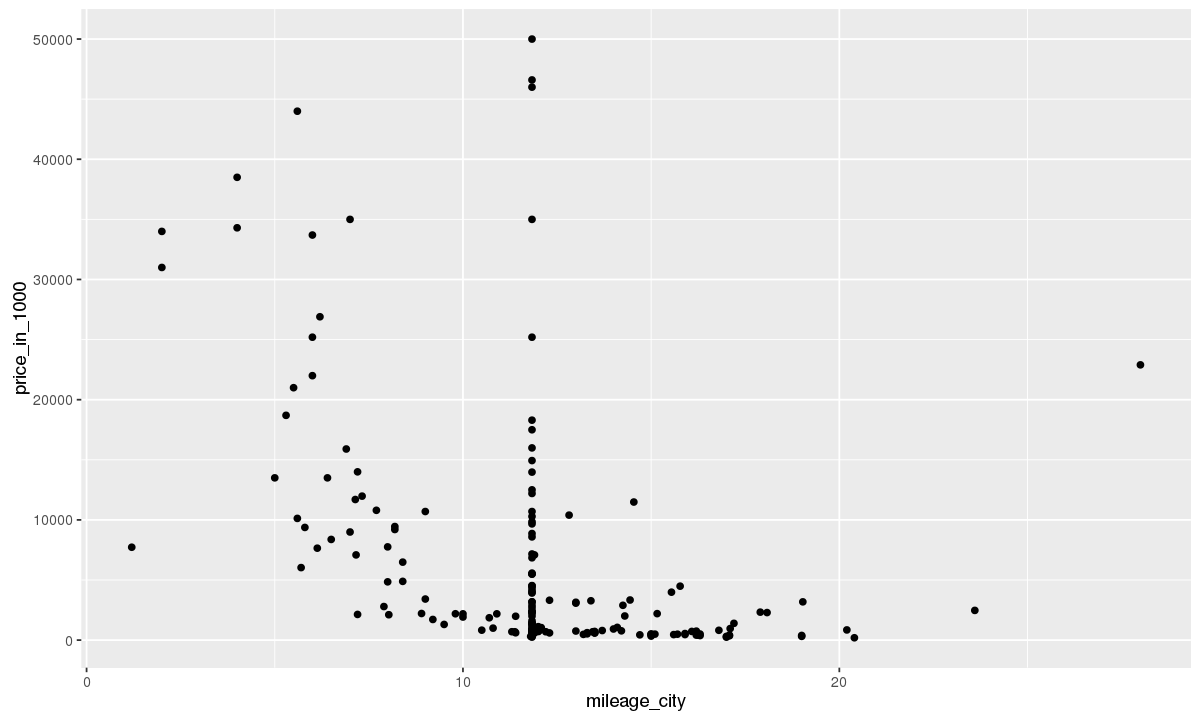

In [5]:
ggplot(df) + aes(mileage_city, price_in_1000) + geom_point()

### Mileage on highway vs Price

In [11]:
cor(df$mileage_highway, df$price_in_1000)

[1] -0.5431588

### Engine capacity vs Mileage in city

In [12]:
cor(df$engine, df$mileage_city)

[1] -0.5832211

### Price vs Mileage in city

In [7]:
cor(df$price_in_1000, df$mileage_city)

[1] -0.4272635

### Gears & Engine capacity vs Mileage on Highway

In [9]:
cor(c(df$engine * df$gears), df$mileage_highway)

[1] -0.6825796

In [10]:
df$mileage_city <- as.numeric(df$mileage_city)
head(df$mileage_city)

[1] 16.20000 11.83425  5.60000  7.00000  5.00000  4.00000

# Linear Regression


#### Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

    y=β0+β1x

What does each term represent?

* y is the response
* x is the feature
* β0 is the intercept
* β1 is the coefficient for x

Together, β0 and β1 are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Price!


#### Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

![](../img/estimating_coefficients.png)

**What elements are present in the diagram?**

* The black dots are the observed values of x and y.
* The blue line is our least squares line.
* The red lines are the residuals, which are the distances between the observed values and the least squares line.

**How do the model coefficients relate to the least squares line?**
* β0 is the intercept (the value of y when x=0)
* β1 is the slope (the change in y divided by change in x)
Here is a graphical depiction of those calculations:

![](../img/slope_intercept.png)

In [16]:
model <- lm(price_in_1000 ~ mileage_city, data = df)
model


Call:
lm(formula = price_in_1000 ~ mileage_city, data = df)

Coefficients:
 (Intercept)  mileage_city  
       19590         -1153  


### Interpreting Model Coefficients

How do we interpret the carat coefficient (β1)?
Increase in carat is associated with a 1.67581673 increase in Sales.

Note that if an increase in carat was associated with a decrease in price, β1 would be negative.

#### Using the Model for Prediction

    y=β0+β1x

In [17]:
summary(model)


Call:
lm(formula = price_in_1000 ~ mileage_city, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-10478  -5221  -2760    991  44050 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     19590       2127    9.21  < 2e-16 ***
mileage_city    -1153        172   -6.70 2.05e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8783 on 201 degrees of freedom
Multiple R-squared:  0.1826,	Adjusted R-squared:  0.1785 
F-statistic: 44.89 on 1 and 201 DF,  p-value: 2.052e-10


## Understanding the Output

<table class="definitions">
	<tr>
		<th>#</th>
		<th>Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td id="residuals">1</td>
		<td>Residuals</td>
		<td>The residuals are the difference between the actual values of the variable you're predicting and predicted values from your regression--<code>y - &ycirc;</code>. For most regressions you want your residuals to look like a normal distribution when plotted. If our residuals are normally distributed, this indicates the mean of the difference between our predictions and the actual values is close to 0 (good) and that when we miss, we're missing both short and long of the actual value, and the likelihood of a miss being far from the actual value gets smaller as the distance from the actual value gets larger.<br><br>Think of it like a dartboard. A good model is going to hit the bullseye some of the time (but not everytime). When it doesn't hit the bullseye, it's missing in all of the other buckets evenly (i.e. not just missing in the 16 bin) and it also misses closer to the bullseye as opposed to on the outer edges of the dartboard.</td>
	</tr>
	<tr>
		<td>2</td>
		<td>Significance Stars</td>
		<td>The stars are shorthand for significance levels, with the number of asterisks displayed according to the p-value computed. <code>***</code> for high significance and <code>*</code> for low significance. </td>
	</tr>
	<tr>
		<td>3</td>
		<td>Estimated Coeffecient</td>
		<td>The estimated coefficient is the value of slope calculated by the regression. It might seem a little confusing that the Intercept also has a value, but just think of it as a slope that is always multiplied by 1. This number will obviously vary based on the magnitude of the variable you're inputting into the regression, but it's always good to spot check this number to make sure it seems reasonable.</td>
	</tr>
	<tr>
		<td>4</td>
		<td>Standard Error of the Coefficient Estimate</td>
		<td>Measure of the variability in the estimate for the coefficient. Lower means better but this number is relative to the value of the coefficient. As a rule of thumb, you'd like this value to be at least an order of magnitude less than the coefficient estimate.<br></td>
	</tr>
	<tr>
		<td>5</td>
		<td>t-value of the Coefficient Estimate</td>
		<td>Score that measures whether or not the coefficient for this variable is meaningful for the model. You probably won't use this value itself, but know that it is used to calculate the p-value and the significance levels.</td>
	</tr>
	<tr>
		<td>6</td>
		<td>Variable p-value</td>
		<td>Probability the variable is <em>NOT</em> relevant. You want this number to be as small as possible. If the number is <em>really</em> small, <code>R</code> will display it in scientific notation.</td>
	</tr>
	<tr>
		<td>7</td>
		<td>Significance Legend</td>
		<td>The more punctuation there is next to your variables, the better.<br><br>Blank=bad, Dots=pretty good, Stars=good, More Stars=very good</td>
	</tr>
	<tr>
		<td>8</td>
		<td>Residual Std Error / Degrees of Freedom</td>
		<td>The Residual Std Error is just the standard deviation of your residuals. You'd like this number to be proportional to the quantiles of the residuals in #1. For a normal distribution, the 1st and 3rd quantiles should be 1.5 +/- the std error. <br><br>The Degrees of Freedom is the difference between the number of observations included in your training sample and the number of variables used in your model (intercept counts as a variable).</td>
	</tr>
	<tr>
		<td>9</td>
		<td>R-squared</td>
		<td>Metric for evaluating the goodness of fit of your model. Higher is better with 1 being the best. Corresponds with the amount of variability in what you're predicting that is explained by the model.<br><span><font color="red">WARNING:</font> While a high R-squared indicates good correlation, <a href="http://en.wikipedia.org/wiki/Correlation_does_not_imply_causation" title="correlation does not imply causation on wikipedia" target="_blank">correlation does <em>not</em> always imply causation</a>.</span></td>
	</tr>
	<tr>
		<td>10</td>
		<td>F-statistic &amp; resulting p-value</td>
		<td>Performs an <a href="http://en.wikipedia.org/wiki/F-test">F-test</a> on the model. This takes the parameters of our model (in our case we only have 1) and compares it to a model that has fewer parameters. In theory the model with more parameters should fit better. If the model with more parameters (your model) doesn't perform better than the model with fewer parameters, the F-test will have a high p-value (probability <em>NOT</em> significant boost). If the model with more parameters is better than the model with fewer parameters, you will have a lower p-value.<br><br>	The DF, or degrees of freedom, pertains to how many variables are in the model.</td>
	</tr>
</table>

### How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

![](../img/r_squared.png)

#### Goodness of fit - R2 score

![](../img/r2.gif)


In [29]:
model$fitted.values

1             2             3             4             5 
   918.311231   5950.093631  13135.431643  11521.849701  13826.966760 
            6             7             8             9            10 
 14979.525290  -1248.498805   5950.093631   5950.093631   5950.093631 
           11            12            13            14            15 
  5950.093631   3165.800363   5950.093631   5950.093631   5950.093631 
           16            17            18            19            20 
 13135.431643  12213.384819  11291.337996  11521.849701  13020.175790 
           21            22            23            24            25 
 17284.642349  13481.199201  13250.687496  12443.896525   5950.093631 
           26            27            28            29            30 
  2946.814242   1678.999860   9908.267760   5950.093631   2831.558390 
           31            32            33            34            35 
  5950.093631 -12681.879416  11153.030972  11360.491507   5950.093631 
           36            37            38            39            40 
  4606.498525   1413.911398   5874.312907   5950.093631  11337.440337 
           41            42            43            44            45 
  5950.093631   5950.093631   5950.093631   5950.093631   1264.078790 
           46            47            48            49            50 
  2301.381466   5950.093631   5950.093631    803.055378  12674.408231 
           51            52            53            54            55 
 12674.408231  12674.408231  17284.642349   5950.093631   6450.592172 
           56            57            58            59            60 
  6565.848025   5950.093631   5950.093631   3453.939995   5950.093631 
           61            62            63            64            65 
  5950.093631   9331.988496  -3691.922887   5950.093631   5950.093631 
           66            67            68            69            70 
  2301.381466    918.311231   3338.684142   7026.871437   5950.093631 
           71            72            73            74            75 
  4606.498525   5950.093631   5950.093631   5950.093631   1264.078790 
           76            77            78            79            80 
  5950.093631   4260.730966   4030.219260   5950.093631   8064.174113 
           81            82            83            84            85 
  1494.590495   8294.685819   5950.093631   5950.093631   5950.093631 
           86            87            88            89            90 
 12904.919937  14979.525290  10715.058731   5950.093631   5950.093631 
           91            92            93            94            95 
  5950.093631   5950.093631   5950.093631   5950.093631   5950.093631 
           96            97            98            99           100 
  5759.057054   5950.093631   5950.093631   5950.093631   5759.057054 
          101           102           103           104           105 
  5950.093631  -2308.852652     -3.735593  -2308.852652   1056.618254 
          106           107           108           109           110 
  5989.568760   5413.289495   2301.381466  11291.337996   5950.093631 
          111           112           113           114           115 
  8986.220937   5950.093631   2647.149025   1609.846348    803.055378 
          116           117           118           119           120 
  5759.057054    -95.940275    -95.940275  -1041.038269  10484.547025 
          121           122           123           124           125 
  5950.093631   4606.498525   5950.093631  12524.575622  10369.291172 
          126           127           128           129           130 
  5950.093631  10369.291172   4145.475113   5950.093631   5950.093631 
          131           132           133           134           135 
  9216.732643   5950.093631  12098.128966   5950.093631  -2343.429408 
          136           137           138           139           140 
  5413.289495   9216.732643   5950.093631   3211.902704   5950.093631 
          141           142         

In [30]:
resid <- data.frame(model$residuals, model$fitted.values)

In [31]:
head(resid)

,model.residuals,model.fitted.values
1,-168.3212,918.3112
2,29049.91,5950.094
3,30864.57,13135.43
4,23478.15,11521.85
5,-326.9668,13826.97
6,23520.47,14979.53


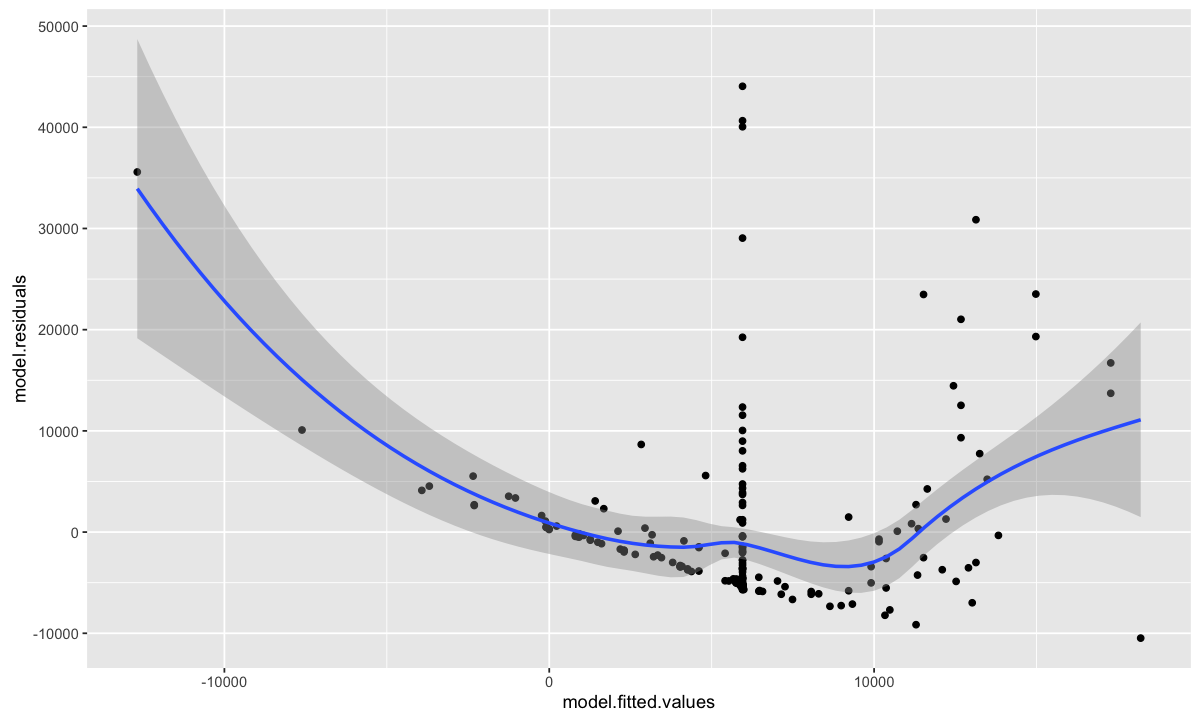

In [34]:
ggplot(resid) + aes(y = model.residuals, x = model.fitted.values) + geom_point() + stat_smooth()

## Using single variable for regression

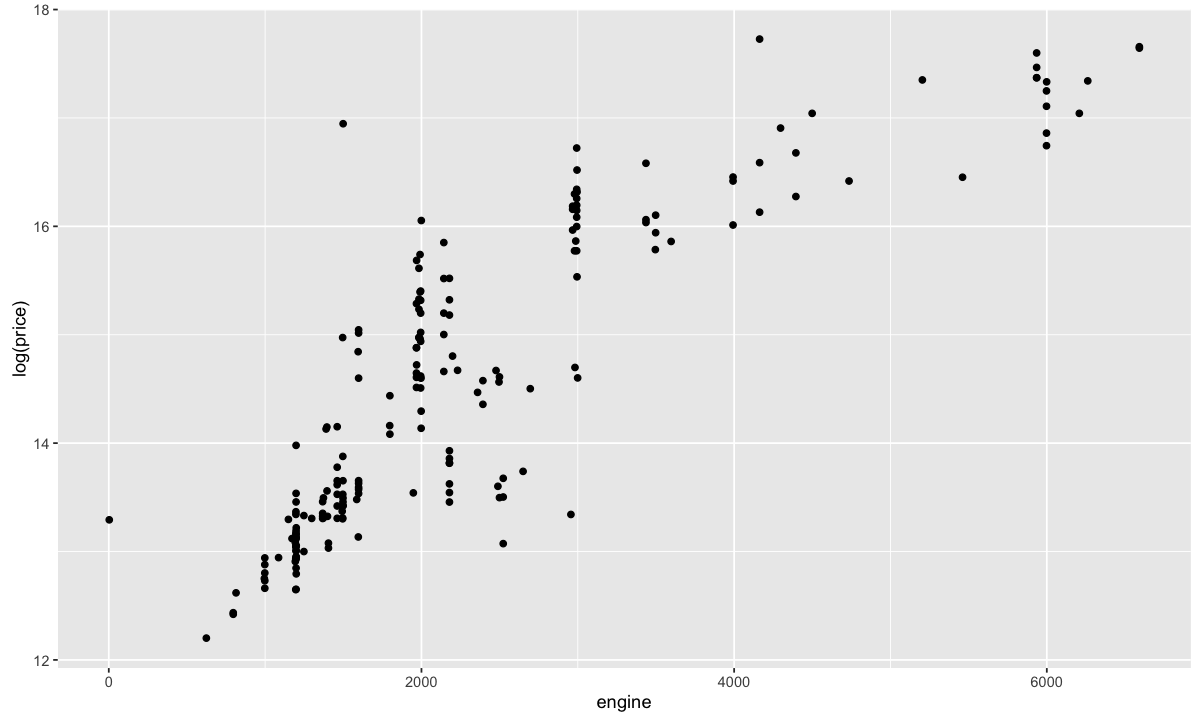

In [61]:
ggplot(df) + aes(y = log(price), x= engine,) + geom_point()

In [62]:
model3 <- lm(log(price) ~ engine, data = df)

In [63]:
summary(model3)


Call:
lm(formula = log(price) ~ engine, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8061 -0.5163 -0.2167  0.5677  3.1149 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.248e+01  1.035e-01  120.60   <2e-16 ***
engine      9.034e-04  3.875e-05   23.31   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7454 on 201 degrees of freedom
Multiple R-squared:   0.73,	Adjusted R-squared:  0.7287 
F-statistic: 543.4 on 1 and 201 DF,  p-value: < 2.2e-16


## Using multiple variable for regression
### Gears & Engine capacity vs Mileage on highway

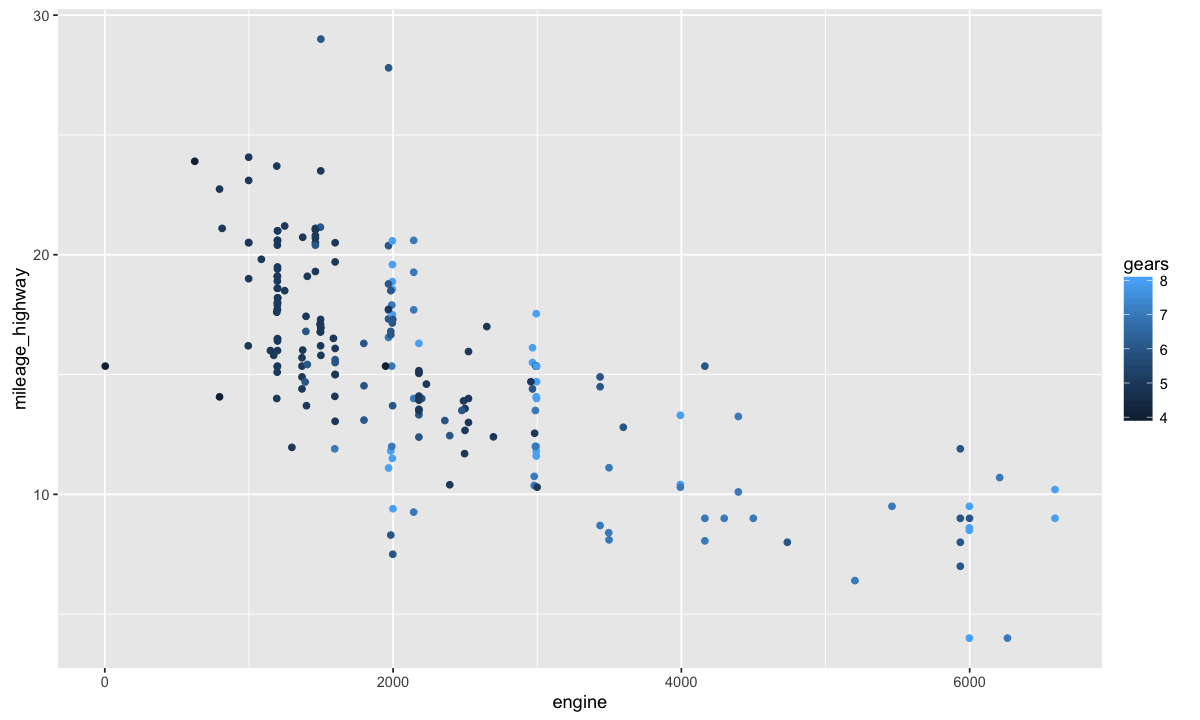

In [64]:
ggplot(df) + aes(y = mileage_highway, x= engine, color = gears) + geom_point()

### Gears & Engine vs Mileage on highway

In [13]:
model <- lm(mileage_highway ~ gears + engine, data = df)

In [14]:
summary(model)


Call:
lm(formula = mileage_highway ~ gears + engine, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.500 -1.965 -0.114  1.804 11.926 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.8982660  1.1397889  18.335   <2e-16 ***
gears       -0.0994274  0.2205727  -0.451    0.653    
engine      -0.0021530  0.0001875 -11.485   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.99 on 200 degrees of freedom
Multiple R-squared:  0.5006,	Adjusted R-squared:  0.4956 
F-statistic: 100.2 on 2 and 200 DF,  p-value: < 2.2e-16


In [45]:
model <- lm(mileage_highway ~ gears + engine - 1, data = df)
summary(model)


Call:
lm(formula = mileage_highway ~ gears + engine - 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.848  -2.582   1.458   3.614  11.795 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
gears   3.6670747  0.1312021   27.95   <2e-16 ***
engine -0.0030459  0.0002957  -10.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 201 degrees of freedom
Multiple R-squared:  0.9068,	Adjusted R-squared:  0.9058 
F-statistic: 977.4 on 2 and 201 DF,  p-value: < 2.2e-16
